In [ ]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-yx4dptx2
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-yx4dptx2
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.6 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369500 sha256=8f70b7c82ccc399a5cfeb7e5833f3a1c8e391ad3b8f87582494c496774d1415f
  Stored in directory: /tmp/pip-ephem-wheel-cache-1lvtlye4/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [ ]:
!! cp -r '/content/drive/MyDrive/dataset/merged.zip' '/content'

[]

In [ ]:
! sudo apt-get install unzip
! unzip '/content/merged.zip' -d '/content//data'

Streaming output truncated to the last 5000 lines.
  inflating: /content//data/dataset_image/851580029368647680.jpg  
  inflating: /content//data/dataset_image/851581265782243328.jpg  
  inflating: /content//data/dataset_image/851584901593931776.jpg  
  inflating: /content//data/dataset_image/851589786385223680.jpg  
  inflating: /content//data/dataset_image/851623486648754176.jpg  
  inflating: /content//data/dataset_image/851638105492910080.jpg  
  inflating: /content//data/dataset_image/851668637681422337.jpg  
  inflating: /content//data/dataset_image/851683467209441282.jpg  
  inflating: /content//data/dataset_image/851688823708889088.jpg  
  inflating: /content//data/dataset_image/851704924568268800.jpg  
  inflating: /content//data/dataset_image/851747075129606145.jpg  
  inflating: /content//data/dataset_image/851754779046944768.jpg  
  inflating: /content//data/dataset_image/851756040895049728.jpg  
  inflating: /content//data/dataset_image/851774723772080128.jpg  
  inflating

In [ ]:
import torch
import clip
from PIL import Image
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

100%|████████████████████████████████████████| 338M/338M [00:01<00:00, 314MiB/s]


In [ ]:
image = preprocess(Image.open("CLIP.png")).unsqueeze(0).to(device)
text = clip.tokenize(["a diagram", "a dog", "a cat"]).to(device)


image_features = model.encode_image(image)
text_features = model.encode_text(text)



FileNotFoundError: ignored

In [ ]:
text_dir = '/content/train.json'
trans_text_dir = '/content/train.csv'


In [ ]:

trans_df = pd.read_csv(trans_text_dir)


In [ ]:
len()

TypeError: ignored

In [ ]:
trans_df

,id,text,iamge_id,label,language
0,0,<user> আমাদের আজকের অ্যাপয়েন্টমেন্টের জন্য দে...,840006160660983809,1,bn
1,0,<उपयोगकर्ता> आज हमारी नियुक्ति के लिए उपस्थित ...,840006160660983809,1,hi
2,0,<用户> 感谢您今天出席我们的约会。,840006160660983809,1,zh-cn
3,0,<usuario> gracias por asistir a nuestra cita d...,840006160660983809,1,es
4,0,"<Benutzer> Vielen Dank, dass Sie heute zu unse...",840006160660983809,1,de
...,...,...,...,...,...
58115,19811,"Retweete, wenn du diesen süßen Kuchen liebst",820051428605644800,0,de
58116,19812,这么好的读物,820051088091082754,0,zh-cn
58117,19813,Das sind die Lebensbedingungen mancher Mensche...,818238683270811653,0,de
58118,19814,获胜者 - seungyoon（简单） - 如果你保存则转发 - 请勿转发/编辑 - cr ...,822954090921684992,0,zh-cn


In [ ]:
ids = []
texts = []
image_ids = []
labels = []
languages =[]
confidence= []
with open(text_dir,'r',encoding='utf-8') as f:
    f1_json = json.load(f)
    i = 0
    for line in tqdm(f1_json):
        text = line['text']
        label = line['label']
        image_id = line['image_id']
        ids.append(i)
        i+=1
        texts.append(text)
        image_ids.append(image_id)
        labels.append(label)
        languages.append('en')
        confidence.append(1)
df_original_Train = pd.DataFrame({'id':ids,'text':texts,'image_id':image_ids,'label':labels,'language':languages,'confidence':confidence})


100%|██████████| 19816/19816 [00:00<00:00, 909695.49it/s]


In [ ]:
df_original_Train

,id,text,image_id,label,language,confidence
0,0,<user> thanks for showing up for our appointme...,840006160660983809,1,en,1
1,1,haha .,908913372199915520,1,en,1
2,2,i love waiting <num> min for a cab - such shor...,916496521406726145,1,en,1
3,3,22 super funny quotes <user>,916364004129304576,1,en,1
4,4,goog morning,853866052589154304,1,en,1
...,...,...,...,...,...,...
19811,19811,retweet if you love this cutie pie,820051428605644800,0,en,1
19812,19812,such a good read,820051088091082754,0,en,1
19813,19813,"this is some people 's living conditions , alw...",818238683270811653,0,en,1
19814,19814,winner - seungyoon ( simple ) - rt if u save -...,822954090921684992,0,en,1


In [ ]:
dot_prods = []
labels = []
text_feats=[]
trans_feats=[ ]
with open(text_dir,'r',encoding='utf-8') as f:
    f1_json = json.load(f)
    print(len(f1_json))
    idx = 0
    for line in tqdm(f1_json):
        with torch.no_grad():
            image_path = '/content/data/dataset_image/' + str(line['image_id']) + '.jpg'
            label = line['label']
            text_trans = trans_df[trans_df['id'] == idx]['text'].tolist()

            #image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
            text = clip.tokenize([line['text']], truncate=True).to(device)
            tokenizes_texts = []
            for t in text_trans:
                tokenizes_texts.append(clip.tokenize(t, truncate=True).to(device))

            #image_features = model.encode_image(image).squeeze(0)
            text_features = model.encode_text(text).squeeze(0)
            trans_feat =[]
            for t in tokenizes_texts:
                trans_feat.append( model.encode_text(t).squeeze(0))
            text_feats.append(text_features)
            trans_feats.append(trans_feat)
            idx+=1

          #  dot_prods.append((torch.dot(image_features, text_features)/(torch.norm(image_features)*torch.norm(image_features))).cpu().numpy())
           # labels.append(line['label'])




19816


100%|██████████| 19816/19816 [16:03<00:00, 20.57it/s]


In [ ]:
len(text_feats)
len(trans_feats)

19816

In [ ]:
dot_prods = []

In [ ]:
for i in range(len(trans_feats)):
    dots = []
    for j in range(len(trans_feats[i])):
        dots.append((torch.dot(text_feats[i], trans_feats[i][j])/(torch.norm(text_feats[i])*torch.norm(trans_feats[i][j]))).cpu().numpy())
    dot_prods.append(dots)

In [ ]:
print(dot_prods[4])

[array(0.7944, dtype=float16), array(0.764, dtype=float16), array(0.774, dtype=float16), array(0.851, dtype=float16), array(0.8613, dtype=float16)]


In [ ]:
converted_arrays = [list(map(lambda x: x, inner_array)) for inner_array in dot_prods]

# Create a DataFrame
df = pd.DataFrame(converted_arrays)

In [ ]:
df

,0,1,2,3,4
0,0.7695,0.7935,0.8306,0.834,0.789
1,0.7886,0.8384,0.8706,0.8643,1.0
2,0.646,0.7314,0.744,0.7837,0.7617
3,0.775,0.7305,0.767,0.8086,0.764
4,0.7944,0.764,0.774,0.851,0.8613
...,...,...,...,...,...
19811,0.7046,None,None,None,None
19812,0.7866,None,None,None,None
19813,0.729,None,None,None,None
19814,0.6445,None,None,None,None


In [ ]:
df.to_csv('dot_prods_valid_multi_by_id.csv')

Now I wanna make a scatter plot of all of the positive samples and their different language translation similarities

In [ ]:
langs = {
 'bn':[],
 'hi': [] ,
 'zh-cn':[],
 'es':[],
 'de':[]
}
language_dict = {
    0: 'bn',  # Bengali
    1: 'hi',  # Hindi
    2: 'zh-cn', # Chinese (Simplified)
    3: 'es',  # Spanish
    4: 'de'   # German
}

In [ ]:
for row in dot_prods:
    if len(row)>1:
        for i,sim in enumerate(row):
          #  print(sim)
            langs[language_dict[i]].append(sim)

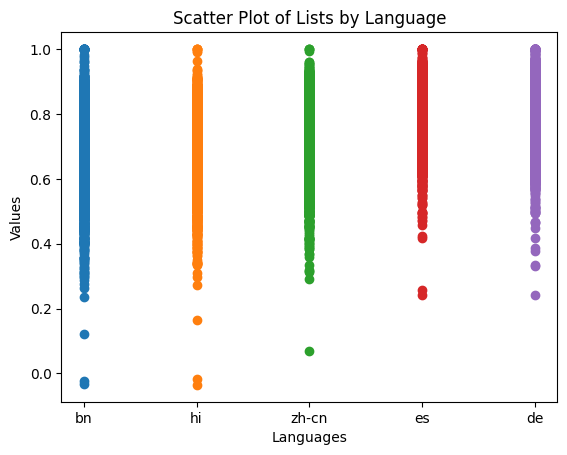

In [ ]:
import matplotlib.pyplot as plt

# Assuming your lists are named list1, list2, list3, list4, list5
# Example: list1 = [0.1, 0.3, 0.5, ...]

# Your provided dictionary
language_dict = {
    1: 'bn',  # Bengali
    2: 'hi',  # Hindi
    3: 'zh-cn', # Chinese (Simplified)
    4: 'es',  # Spanish
    5: 'de'   # German
}

# Create x-coordinates for each list
x1 = [1] * len(langs[language_dict[1]])
x2 = [2] * len(langs[language_dict[2]])
x3 = [3] * len(langs[language_dict[3]])
x4 = [4] * len(langs[language_dict[4]])
x5 = [5] * len(langs[language_dict[5]])

# Create the scatter plot
plt.scatter(x1, langs[language_dict[1]])
plt.scatter(x2, langs[language_dict[2]])
plt.scatter(x3, langs[language_dict[3]])
plt.scatter(x4, langs[language_dict[4]])
plt.scatter(x5, langs[language_dict[5]])

# Set custom tick labels for the x-axis
plt.xticks([1, 2, 3, 4, 5], [language_dict[x] for x in range(1, 6)])

# Add labels and title if needed
plt.xlabel('Languages')
plt.ylabel('Values')
plt.title('Scatter Plot of Lists by Language')

# Show the plot
plt.show()

How many instances do we have where atleast one traqnslation is >0.8 similarity?

In [ ]:
trans_df

,id,text,iamge_id,label,language
0,0,<user> আমাদের আজকের অ্যাপয়েন্টমেন্টের জন্য দে...,840006160660983809,1,bn
1,0,<उपयोगकर्ता> आज हमारी नियुक्ति के लिए उपस्थित ...,840006160660983809,1,hi
2,0,<用户> 感谢您今天出席我们的约会。,840006160660983809,1,zh-cn
3,0,<usuario> gracias por asistir a nuestra cita d...,840006160660983809,1,es
4,0,"<Benutzer> Vielen Dank, dass Sie heute zu unse...",840006160660983809,1,de
...,...,...,...,...,...
58115,19811,"Retweete, wenn du diesen süßen Kuchen liebst",820051428605644800,0,de
58116,19812,这么好的读物,820051088091082754,0,zh-cn
58117,19813,Das sind die Lebensbedingungen mancher Mensche...,818238683270811653,0,de
58118,19814,获胜者 - seungyoon（简单） - 如果你保存则转发 - 请勿转发/编辑 - cr ...,822954090921684992,0,zh-cn


In [ ]:
cnt =0
for i in range(len(langs['bn'])):
    if langs['bn'][i]>0.75 or langs['hi'][i]>0.75 or langs['zh-cn'][i]>0.75 or langs['es'][i]>0.75 or langs['de'][i]>0.75:
        cnt+=1


In [ ]:
cnt

8755

In [ ]:
cnt/2408

3.6357973421926912

In [ ]:
dot_prods

[[array(0.7695, dtype=float16),
  array(0.7935, dtype=float16),
  array(0.8306, dtype=float16),
  array(0.834, dtype=float16),
  array(0.789, dtype=float16)],
 [array(0.7886, dtype=float16),
  array(0.8384, dtype=float16),
  array(0.8706, dtype=float16),
  array(0.8643, dtype=float16),
  array(1., dtype=float16)],
 [array(0.646, dtype=float16),
  array(0.7314, dtype=float16),
  array(0.744, dtype=float16),
  array(0.7837, dtype=float16),
  array(0.7617, dtype=float16)],
 [array(0.775, dtype=float16),
  array(0.7305, dtype=float16),
  array(0.767, dtype=float16),
  array(0.8086, dtype=float16),
  array(0.764, dtype=float16)],
 [array(0.7944, dtype=float16),
  array(0.764, dtype=float16),
  array(0.774, dtype=float16),
  array(0.851, dtype=float16),
  array(0.8613, dtype=float16)],
 [array(0.6807, dtype=float16),
  array(0.7007, dtype=float16),
  array(0.784, dtype=float16),
  array(0.81, dtype=float16),
  array(0.84, dtype=float16)],
 [array(0.607, dtype=float16),
  array(0.65, dtype=fl

In [ ]:
language_dict1 = {
    0: 'bn',  # Bengali
    1: 'hi',  # Hindi
    2: 'zh-cn', # Chinese (Simplified)
    3: 'es',  # Spanish
    4: 'de'   # German
}

In [ ]:
trans_df_gold =  pd.DataFrame(data=None, columns=trans_df.columns, index=trans_df.index)
trans_df_gold = trans_df_gold[0:0]

In [ ]:
trans_df['conf'] = np.nan

In [ ]:
trans_df_gold

,id,text,iamge_id,label,language,conf
9,1,Haha.,908913372199915520,1,de,1.000000
48,9,fondo,875711381030547456,1,es,0.912598
48,9,fondo,875711381030547456,1,es,0.912598
152,30,<user> 你对 <user> 太刻薄了。可怜的人忍受了这么多,701718345888890880,1,zh-cn,0.905762
152,30,<user> 你对 <user> 太刻薄了。可怜的人忍受了这么多,701718345888890880,1,zh-cn,0.905762
...,...,...,...,...,...,...
58114,19810,上帝真的祝福我有机会在坎贝尔大学进一步发展我的学术和足球生涯！ ！ ！,821868237604458496,0,zh-cn,0.490479
58115,19811,"Retweete, wenn du diesen süßen Kuchen liebst",820051428605644800,0,de,0.704590
58116,19812,这么好的读物,820051088091082754,0,zh-cn,0.786621
58117,19813,Das sind die Lebensbedingungen mancher Mensche...,818238683270811653,0,de,0.729004


In [ ]:
dot_prods[0][0].reshape(1)

array([0.7695], dtype=float16)

In [ ]:
for i in tqdm(range(19815)):
    if len(dot_prods[i])>1:
        max_idx = 0
        max =0
        for idx in range(5):
            if dot_prods[i][idx].reshape(1)[0]>max:
                max = dot_prods[i][idx].reshape(1)[0]
                max_idx = idx
            if max>0.9:
                trans_df_gold = trans_df_gold.append(trans_df[(trans_df['id'] == i) & (trans_df['language'] == language_dict1[max_idx])])
                #trans_df_gold.iloc[i]['conf'] = dot_prods[i][max_idx]
              #  print(len(trans_df_gold))
               # print(i)
                trans_df_gold.at[trans_df_gold.index[-1], 'conf']= max
                #assing the original engling
    else:
        trans_df_gold = trans_df_gold.append(trans_df[(trans_df['id'] == i)])
        trans_df_gold.at[trans_df_gold.index[-1], 'conf']= dot_prods[i][0].reshape(1)[0]


make a good dataset wehre 1-0.43 portion of positive data has a 'good' translation. Then we test our model on that

In [ ]:
trans_df_gold.to_csv('gold_multi_ling_train.csv')

coding here ^^^

In [ ]:
dot_prods_valid = []
labels_valid = []
with open(text_dir,'r',encoding='utf-8') as f:
    f1_json = json.load(f)
    for line in tqdm(f1_json):
        with torch.no_grad():
            image_path = '/content/data/dataset_image/' + str(line['image_id']) + '.jpg'
            image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
            text = clip.tokenize([line['text']], truncate=True).to(device)
            image_features = model.encode_image(image).squeeze(0)
            text_features = model.encode_text(text).squeeze(0)
            #print(image_features.shape)
            #print(text_features.shape)
            dot_prods_valid.append((torch.dot(image_features, text_features)/(torch.norm(image_features)*torch.norm(text_features))).cpu().numpy())
            labels_valid.append(line['label'])




100%|██████████| 2410/2410 [01:36<00:00, 24.85it/s]


In [ ]:
positives_valid = []
negatives_valid = []
for i in range(len(dot_prods_valid)):
    if labels_valid[i]==1:
        positives_valid.append(dot_prods_valid[i])
    else:
        negatives_valid.append(dot_prods_valid[i])

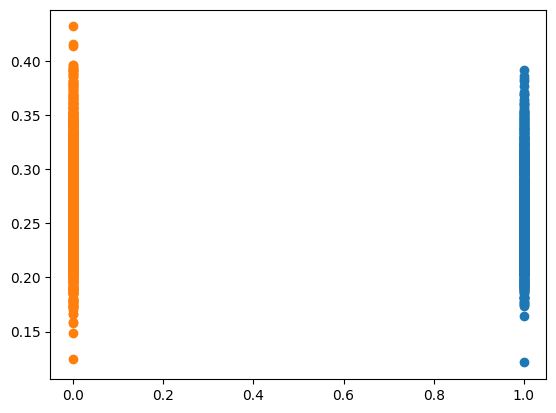

In [ ]:
import matplotlib.pyplot as plt
plt.scatter([1]*len(positives_valid),positives_valid )
plt.scatter([0]*len(negatives_valid),negatives_valid )
plt.show()

In [ ]:
positives = []
negatives = []
for i in range(len(dot_prods)):
    if labels[i]==1:
        positives.append(dot_prods[i])
    else:
        negatives.append(dot_prods[i])

In [ ]:
for i in range(len(dot_prods)):
    if labels[i]==0:
        print(dot_prods[i])

Streaming output truncated to the last 5000 lines.
0.2339
0.225
0.2632
0.3743
0.2383
0.3228
0.2236
0.314
0.2216
0.3918
0.289
0.3298
0.367
0.3342
0.265
0.2693
0.2465
0.2325
0.3354
0.3538
0.3308
0.2218
0.214
0.3313
0.2252
0.265
0.2507
0.3533
0.2686
0.383
0.2455
0.2788
0.2622
0.2852
0.2401
0.2406
0.267
0.2357
0.2291
0.267
0.2527
0.2465
0.2399
0.324
0.2261
0.2422
0.2512
0.2673
0.3257
0.1997
0.2032
0.1626
0.251
0.254
0.3242
0.2253
0.2317
0.264
0.226
0.2448
0.3145
0.3047
0.2688
0.266
0.321
0.323
0.2593
0.2367
0.278
0.2676
0.3264
0.3157
0.3096
0.2217
0.2715
0.2502
0.2354
0.2888
0.2627
0.35
0.3132
0.3184
0.2346
0.3198
0.2544
0.31
0.2573
0.2756
0.315
0.294
0.2217
0.283
0.1938
0.2191
0.288
0.2534
0.243
0.263
0.2118
0.2458
0.2554
0.2479
0.3567
0.298
0.2935
0.3074
0.3245
0.2522
0.3088
0.232
0.3547
0.2532
0.3025
0.198
0.2627
0.2744
0.258
0.188
0.3477
0.2026
0.3472
0.3557
0.254
0.256
0.3052
0.2886
0.2664
0.264
0.2046
0.31
0.2725
0.332
0.253
0.2158
0.291
0.1947
0.2542
0.3098
0.2957
0.2263
0.2798
0.25

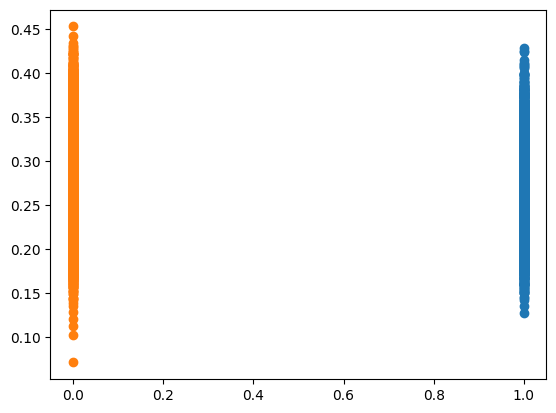

In [ ]:
import matplotlib.pyplot as plt
plt.scatter([1]*len(positives),positives )
plt.scatter([0]*len(negatives),negatives )
plt.show()